In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('earthquake.csv')
print(df.head())

               Origin Time  Latitude  Longitude  Depth  Magnitude  \
0  2021-07-31 09:43:23 IST     29.06      77.42    5.0        2.5   
1  2021-07-30 23:04:57 IST     19.93      72.92    5.0        2.4   
2  2021-07-30 21:31:10 IST     31.50      74.37   33.0        3.4   
3  2021-07-30 13:56:31 IST     28.34      76.23    5.0        3.1   
4  2021-07-30 07:19:38 IST     27.09      89.97   10.0        2.1   

                               Location  
0          53km NNE of New Delhi, India  
1  91km W of Nashik, Maharashtra, India  
2   49km WSW of Amritsar, Punjab, India  
3           50km SW of Jhajjar, Haryana  
4            53km SE of Thimphu, Bhutan  


In [4]:
# Drop missing values if any
df = df.dropna(subset=['Latitude', 'Longitude', 'Depth', 'Magnitude'])
print(f"\nTotal Records after cleaning: {df.shape[0]}")


Total Records after cleaning: 2719


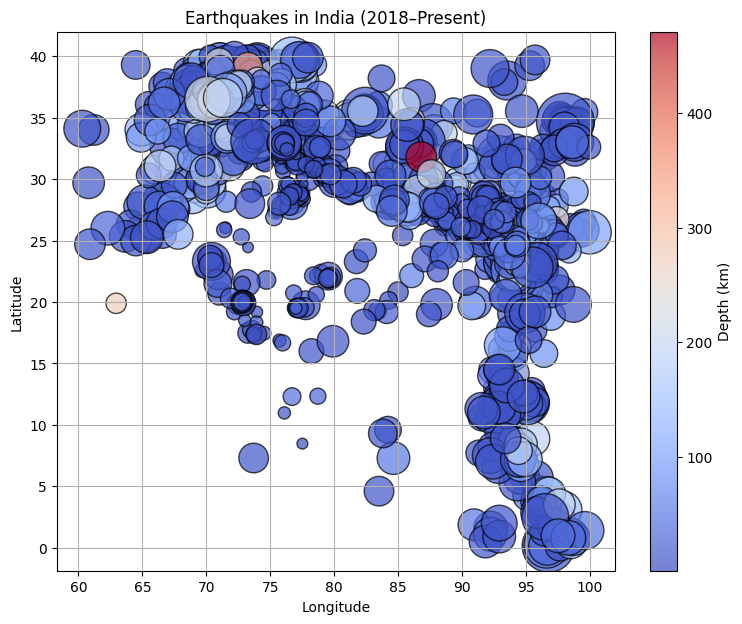

In [5]:
plt.figure(figsize=(9,7))
sc = plt.scatter(
    df['Longitude'], df['Latitude'],
    c=df['Depth'],                         # color = depth
    s=df['Magnitude']**3 * 5,              # bubble size = magnitude³
    cmap='coolwarm', alpha=0.7, edgecolors='k'
)

plt.colorbar(sc, label='Depth (km)')
plt.title("Earthquakes in India (2018–Present)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

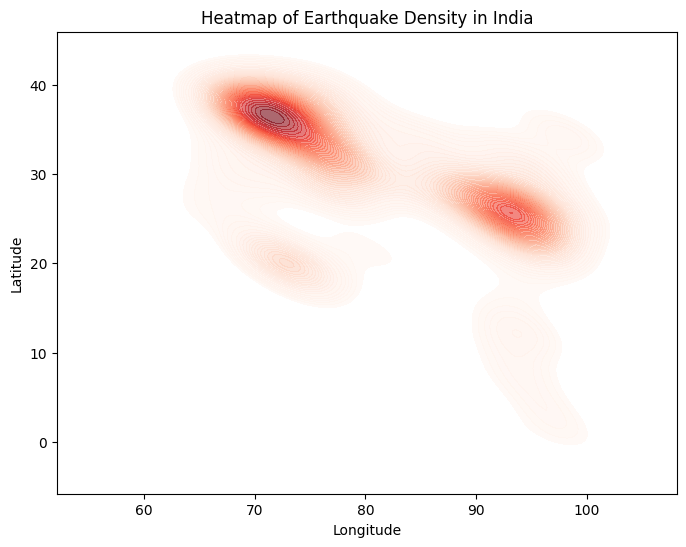

In [6]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    x=df['Longitude'], y=df['Latitude'],
    fill=True, cmap='Reds', alpha=0.6, levels=50
)
plt.title("Heatmap of Earthquake Density in India")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


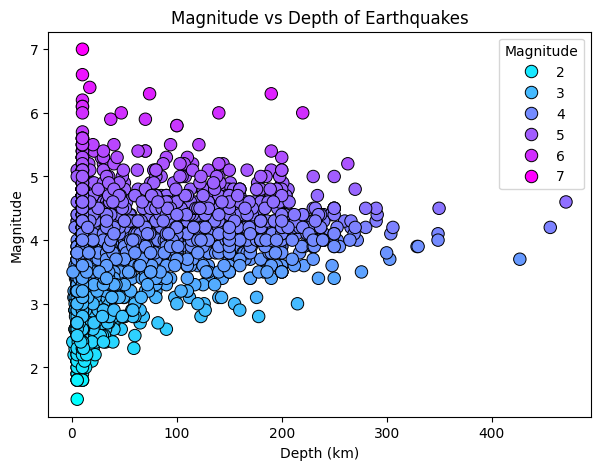

In [7]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Depth', y='Magnitude', data=df,
    hue='Magnitude', palette='cool', s=80, edgecolor='black'
)
plt.title("Magnitude vs Depth of Earthquakes")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.show()

In [8]:
print("\n📊 RESULT ANALYSIS 📊")
print(f"Total Earthquakes: {len(df)}")
print(f"Average Magnitude: {df['Magnitude'].mean():.2f}")
print(f"Average Depth: {df['Depth'].mean():.2f} km")


📊 RESULT ANALYSIS 📊
Total Earthquakes: 2719
Average Magnitude: 3.77
Average Depth: 53.40 km


In [9]:
# Optional: Show most affected regions (top locations by frequency)
top_locs = df['Location'].value_counts().head(5)
print("\nTop 5 Most Frequent Earthquake Locations:")
print(top_locs)


Top 5 Most Frequent Earthquake Locations:
Location
93km W of Nashik, Maharashtra, India             13
103km N of Mumbai, Maharashtra, India            12
157km N of Srinagar, Jammu and Kashmir, India     8
106km SE of Fayzabad, Afghanistan                 7
90km E of Katra, Jammu and Kashmir, India         7
Name: count, dtype: int64
